In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [2]:
#import dataset from data.csv file
df = pd.read_csv('Dummy_Month.csv')
df.head()

,Unnamed: 0,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,0,1001,Unoccupied,0,0,Wednesday,2021-08-04
1,1,1002,Present,0,0,Wednesday,2021-08-04
2,2,1003,Present,0,0,Wednesday,2021-08-04
3,3,1004,Unoccupied,0,0,Wednesday,2021-08-04
4,4,1005,Present,0,0,Wednesday,2021-08-04


In [3]:
#The amount of observations (rows) and characteristics(columns) in a dataset
print ('The Total Rows in the dataset = ' + str(df.shape[0]))
print ('The Total Columns in the dataset = ' + str(df.shape[1]))

The Total Rows in the dataset = 13440
The Total Columns in the dataset = 7


In [4]:
Bay_ID = (df['Bay_id'] == 1001)
Multiple_Bay_ID = (df['Bay_id'].isin([1001, 1003, 1005]))
Parking_Status = (df['Status'] == 'Present')
Day_Of_Week = (df['DayOfWeek'] == 'Wednesday')
Date = (df['Date'] == '2021-08-04')
Hour = (df['Hour'] == 10)

In [5]:
CountStatus = df.loc[Multiple_Bay_ID & Parking_Status].groupby('Status').DayOfWeek.value_counts().unstack(0)

CountStatus = CountStatus.reset_index()
CountStatus['Present'] = (CountStatus['Present'] / 4).round(0)
CountStatus.columns = ['Day', 'Mean_Parking_Availabilities']
CountStatus = CountStatus.set_index('Day').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

CountStatus

,Day,Mean_Parking_Availabilities
0,Monday,144.0
1,Tuesday,145.0
2,Wednesday,145.0
3,Thursday,149.0
4,Friday,142.0
5,Saturday,138.0
6,Sunday,137.0


In [6]:
Currentday_Count = df.loc[Multiple_Bay_ID & Parking_Status & Date].groupby('Status').DayOfWeek.value_counts().unstack(0)
Currentday_Count = Currentday_Count.reset_index()
Currentday_Count.columns = ['Day', 'Parking_Availabilities']

Day_of_Choice = Currentday_Count.iloc[0,0]

Currentday_Count

,Day,Parking_Availabilities
0,Wednesday,139


In [7]:
#Percentage Difference 
four_wk_avg = CountStatus['Mean_Parking_Availabilities'][CountStatus['Day'] == 'Wednesday'].iloc[0]
Today = Currentday_Count['Parking_Availabilities'][Currentday_Count['Day'] == 'Wednesday'].iloc[0]
Percent_Diff = (Today - four_wk_avg)/(four_wk_avg)

print(four_wk_avg)
print(Today)
print(Percent_Diff)

145.0
139
-0.041379310344827586


In [8]:
def popular_times(Percent_Diff):
    if (-0.2 >= Percent_Diff):
        return ("The parking availabillity is less busy than usual")
    if (-0.2 < Percent_Diff <= -0.1):
        return("The parking availabillity is not too busy")
    if (-0.1 < Percent_Diff <= -0.025):
        return ("The parking availabillity is a little less busy")
    if (-0.025 < Percent_Diff < 0.025):
        return ("The parking availabillity is as busy as expected")    
    if (0.025 <= Percent_Diff < 0.1):
        return ("The parking availabillity is a little busy")   
    if (0.1 <= Percent_Diff < 0.2):
        return ("The parking availabillity is much busier than usual")
    if (Percent_Diff >= 0.2):
        return ("The parking availabillity is very busy")
    
print(popular_times(Percent_Diff))

The parking availabillity is a little less busy


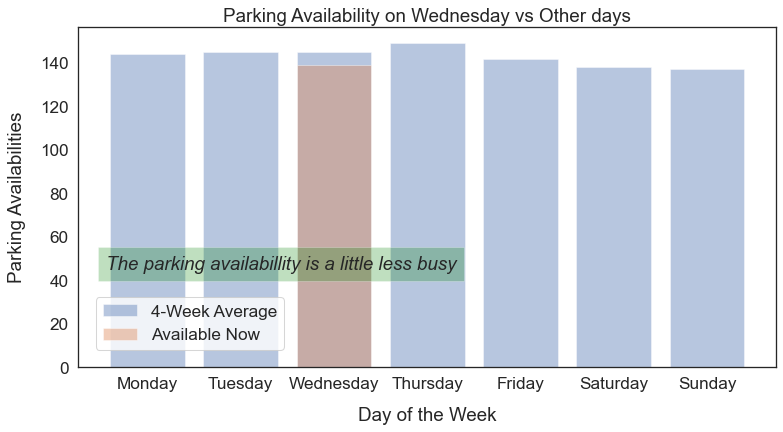

In [11]:
sns.set(font_scale=1.5)
figure(figsize=(12, 6), dpi=75)
sns.set_style("white")

plt.ylabel("Parking Availabilities", labelpad=14)
plt.xlabel("Day of the Week", labelpad=14)
plt.title(f"Parking Availability on {Day_of_Choice} vs Other days", y=1)

plt.bar(CountStatus['Day'], CountStatus['Mean_Parking_Availabilities'],alpha=0.4 , label="4-Week Average")
plt.bar(Currentday_Count['Day'], Currentday_Count['Parking_Availabilities'],alpha=0.4, label="Available Now")

plt.text(-0.45, 45, f"{popular_times(Percent_Diff)}", style='italic', 
         bbox={'facecolor': 'green', 'alpha': 0.25, 'pad': 7.5})

plt.legend(loc ="lower left", borderaxespad=1)

plt.show()